### Import Required Libraries

In [38]:
# Libraries to process file and visualization for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Library version
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
# print("Matplotlib Version: ", matplotlib.__version__)

Numpy Version:  2.3.3
Pandas Version:  2.3.2


### Import Dataset

In [3]:
# Import dataset file and get panda dataframe. Also copy original dataframe to future reference.
dataset = pd.read_csv("Gujarat_Rainfall.csv")
dataset_original = dataset.copy()

### Summary of Dataset
This dataset is a comprehensive collection of historical weather data for `Gujarat` state in India. It includes information on the amount of rainfall recorded each day from the `8th DEC 2015` to the `10th FEB 2025`, allowing for a detailed analysis of precipitation patterns across different districts in Gujarat. This dataset contains 15 columns such as date of record, month, season, station name (exact location), state, district, average temperature, minimum temperature, maximum temperature, wind speed, air pressure, elevation, latitude, longitude, rainfall in mm.

In [4]:
# check total number of rows and columns
dataset.shape

(61988, 15)

In [5]:
# Check first five rows 
dataset.head()

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall
0,2015-12-08,December,Winter,Deesa,GJ,Banaskantha,26.4,14.6,32.7,NaN,NaN,135,24.2,72.2,NaN
1,2015-12-09,December,Winter,Deesa,GJ,Banaskantha,25.6,15.6,30.0,NaN,NaN,135,24.2,72.2,NaN
2,2015-12-10,December,Winter,Deesa,GJ,Banaskantha,25.2,16.6,30.0,NaN,NaN,135,24.2,72.2,NaN
3,2015-12-11,December,Winter,Deesa,GJ,Banaskantha,21.5,13.4,25.6,NaN,NaN,135,24.2,72.2,NaN
4,2015-12-12,December,Winter,Deesa,GJ,Banaskantha,20.8,10.2,26.2,NaN,NaN,135,24.2,72.2,NaN


### Columns Description
- `date_of_record` - The specific date on which the weather observations were recorded (in `YYYY-MM-DD` format).

- `month` - The month extracted from the date, useful for monthly trend analysis.

- `season` - The meteorological season corresponding to the date — typically `Winter (Dec–Feb)`, `Pre-Monsoon (Mar–May)`, `Monsoon (Jun–Sep)`, or `Post-Monsoon (Oct–Nov)` for India.

- `station_name` - The name of the weather station where the data was collected. Each station corresponds to a specific geographical location.

- `state` - The Indian state or union territory where the weather station is located.

- `district` - The district (administrative division) within the state where the weather station operates.

- `avg_temp` - The average daily temperature recorded at the station, measured in degrees Celsius (°C).

- `min_temp` - The minimum temperature observed during the day (°C).

- `max_temp` - The maximum temperature observed during the day (°C).  

- `wind_speed` - The wind speed recorded at the station, measured in kilometers per hour (km/h).

- `air_pressure` - The atmospheric pressure measured at the station, measured in hectopascals (hPa) or millibars (mb).

- `elevation` - The height above sea level of the weather station, measured in meters (m) — affects temperature and pressure readings.

- `latitude` - The geographical latitude (in decimal degrees) of the station, indicating its north–south position on the Earth.

- `longitude` - The geographical longitude (in decimal degrees) of the station, indicating its east–west position on the Earth.

- `rainfall` - The total rainfall measured during the day, measured in millimeters (mm).

In [6]:
# check all available columns
dataset.columns

Index(['date_of_record', 'month', 'season', 'station_name', 'state',
       'district', 'avg_temp', 'min_temp', 'max_temp', 'wind_speed',
       'air_pressure', 'elevation', 'latitude', 'longitude', 'rainfall'],
      dtype='object')

In [7]:
# Check last five rows
dataset.tail()

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall
61983,2025-02-06,February,Winter,Surat / Magdala,GJ,Surat,24.3,17.0,31.0,20.2,1012.3,5,21.1141,72.7418,0.0
61984,2025-02-07,February,Winter,Surat / Magdala,GJ,Surat,25.5,19.0,33.0,14.4,1012.6,5,21.1141,72.7418,0.0
61985,2025-02-08,February,Winter,Surat / Magdala,GJ,Surat,25.3,17.0,33.0,9.8,1012.3,5,21.1141,72.7418,0.0
61986,2025-02-09,February,Winter,Surat / Magdala,GJ,Surat,25.3,17.0,34.0,8.3,1011.8,5,21.1141,72.7418,0.0
61987,2025-02-10,February,Winter,Surat / Magdala,GJ,Surat,24.6,17.0,30.7,14.0,1013.0,5,21.1141,72.7418,0.0


In [8]:
# Check random five rows
dataset.sample(5)

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall
56,2016-02-04,February,Winter,Deesa,GJ,Banaskantha,23.5,10.0,30.0,NaN,NaN,135,24.2000,72.2000,NaN
59526,2018-05-13,May,Summer,Surat / Magdala,GJ,Surat,31.4,28.2,NaN,NaN,NaN,5,21.1141,72.7418,NaN
40792,2024-06-18,June,Summer,Porbandar,GJ,Porbandar,31.8,29.7,35.4,19.5,1004.0,5,21.6500,69.6667,0.0
12382,2023-12-20,December,Winter,New Kandla,GJ,Kachchh,21.5,19.2,27.4,20.3,1017.6,10,23.0000,70.2167,0.0
29844,2019-12-22,December,Winter,Rajkot,GJ,Rajkot,21.0,13.3,NaN,NaN,NaN,134,22.3000,70.7833,NaN


In [9]:
# check all columns datatypes also observe non-null values.
dataset.info()

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There are total 61988 records available, range from 0 to 61987.
# 2) All columns except "date_of_record" are in correct datatype. convert "date_of_record" in datetime datatype. 
# 3) The "state" column we can remove. because, this dataset only for Gujarat state.
# 4) There are missing values in min_temp, max_temp, wind_speed, air_pressure, rainfall.
# -------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61988 entries, 0 to 61987
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_of_record  61988 non-null  object 
 1   month           61988 non-null  object 
 2   season          61988 non-null  object 
 3   station_name    61988 non-null  object 
 4   state           61988 non-null  object 
 5   district        61988 non-null  object 
 6   avg_temp        61988 non-null  float64
 7   min_temp        60131 non-null  float64
 8   max_temp        50259 non-null  float64
 9   wind_speed      39895 non-null  float64
 10  air_pressure    39474 non-null  float64
 11  elevation       61988 non-null  int64  
 12  latitude        61988 non-null  float64
 13  longitude       61988 non-null  float64
 14  rainfall        40122 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 7.1+ MB


### Checking Missing Values

In [10]:
# Get total missing values and it's percentages

total_missing = dataset.isnull().sum()
percentage_missing = np.round((total_missing * 100) / len(dataset), 2)

missing_value_df = pd.DataFrame([total_missing, percentage_missing], index=["Total_Missing", "%_Missing"]).T
missing_value_df

# -------------------------------------------------------------------------------------------
# Observation :
# 1) Here, we have missing values in dataset. columns 'min_temp' and 'max_temp' have 3% and 18.92% missing values resp.
# 2) columns 'wind_speed', 'air_pressure' and 'rainfall' have 35.64% , 36.32% , 35.27% missing values resp.
# 3) Columns with missing values 25% or greater need to drop respective column.
# 4) In imputation if variable is char then we will use mode function and if it is numeric then we will first check for outrliers if there are outrliers then we will impute by median else we will impute using mean.
# -------------------------------------------------------------------------------------------

,Total_Missing,%_Missing
date_of_record,0.0,0.00
month,0.0,0.00
season,0.0,0.00
station_name,0.0,0.00
state,0.0,0.00
district,0.0,0.00
avg_temp,0.0,0.00
min_temp,1857.0,3.00
max_temp,11729.0,18.92
wind_speed,22093.0,35.64


In [11]:
dataset[dataset["wind_speed"].isnull()]

,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall
0,2015-12-08,December,Winter,Deesa,GJ,Banaskantha,26.4,14.6,32.7,NaN,NaN,135,24.2000,72.2000,NaN
1,2015-12-09,December,Winter,Deesa,GJ,Banaskantha,25.6,15.6,30.0,NaN,NaN,135,24.2000,72.2000,NaN
2,2015-12-10,December,Winter,Deesa,GJ,Banaskantha,25.2,16.6,30.0,NaN,NaN,135,24.2000,72.2000,NaN
3,2015-12-11,December,Winter,Deesa,GJ,Banaskantha,21.5,13.4,25.6,NaN,NaN,135,24.2000,72.2000,NaN
4,2015-12-12,December,Winter,Deesa,GJ,Banaskantha,20.8,10.2,26.2,NaN,NaN,135,24.2000,72.2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61826,2024-08-30,August,Monsoon,Surat / Magdala,GJ,Surat,28.9,26.6,NaN,NaN,NaN,5,21.1141,72.7418,5.1
61827,2024-08-31,August,Monsoon,Surat / Magdala,GJ,Surat,29.1,26.5,NaN,NaN,NaN,5,21.1141,72.7418,0.3
61828,2024-09-01,September,Monsoon,Surat / Magdala,GJ,Surat,29.5,26.4,NaN,NaN,NaN,5,21.1141,72.7418,0.0
61829,2024-09-03,September,Monsoon,Surat / Magdala,GJ,Surat,26.8,24.8,NaN,NaN,NaN,5,21.1141,72.7418,39.1


### Check Statistical Measure for Numerical Columns

In [12]:
# Mean and Median(50%) difference is more than 10% then there are possible outliers present in data.
dataset.describe().T

# -------------------------------------------------------------------------------------------
# Observation :
# 1) In 'elevation' column, mean and median difference is more than 10% then there are possible outliers present in column.
# -------------------------------------------------------------------------------------------

,count,mean,std,min,25%,50%,75%,max
avg_temp,61988.0,27.370825,4.000929,12.2000,24.9000,28.0000,29.9000,40.9000
min_temp,60131.0,22.313973,5.049992,1.4000,18.6000,24.0000,26.2000,31.8000
max_temp,50259.0,32.846710,4.183345,18.6000,30.0000,32.5000,35.2000,50.3000
wind_speed,39895.0,13.069522,6.229127,0.0000,8.7000,11.9000,16.1000,65.4000
air_pressure,39474.0,1008.846887,5.191823,988.8000,1004.9000,1009.1000,1013.2000,1022.6000
elevation,61988.0,32.506227,41.338043,0.0000,5.0000,10.0000,50.0000,135.0000
latitude,61988.0,22.247595,0.937981,20.6167,21.3167,22.3667,23.0667,24.2000
longitude,61988.0,71.169081,1.480146,68.8500,69.6667,70.9167,72.7167,73.2667
rainfall,40122.0,3.747032,14.931792,0.0000,0.0000,0.0000,0.7000,485.9000


In [13]:
temp_df = dataset.describe().T

temp_df["mean_median_diff"] = (np.abs(temp_df["mean"] - temp_df["50%"]) * 100) / (temp_df["50%"])

temp_df[(temp_df["mean_median_diff"] != float("inf")) & (temp_df["mean_median_diff"] > 10)]

,count,mean,std,min,25%,50%,75%,max,mean_median_diff
elevation,61988.0,32.506227,41.338043,0.0,5.0,10.0,50.0,135.0,225.06227


### Check Duplicate Records

In [14]:
dataset.duplicated().sum()

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There is no duplicated entries in dataset.
# -------------------------------------------------------------------------------------------

np.int64(0)

### Types of Columns
- Numerical - avg_temp, min_temp, max_temp, wind_speed, air_pressure, elevation, latitude, longitude, rainfall.
- Categorical - month, season, station_name, state, district.
- Datatime - date_of_record.

### Univariate Analysis

#### avg_temp

In [15]:
dataset["avg_temp"].describe()

count    61988.000000
mean        27.370825
std          4.000929
min         12.200000
25%         24.900000
50%         28.000000
75%         29.900000
max         40.900000
Name: avg_temp, dtype: float64

<Axes: xlabel='avg_temp', ylabel='Count'>

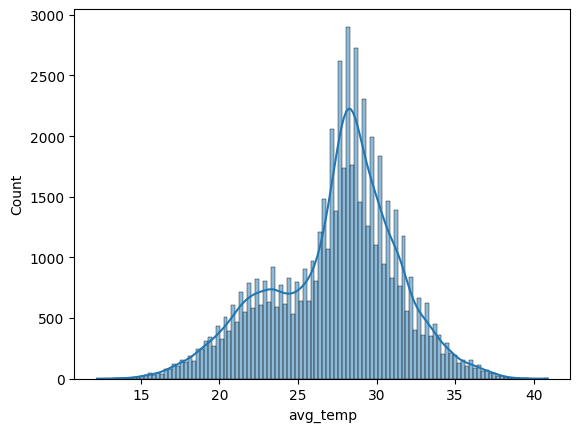

In [41]:
sns.histplot(dataset["avg_temp"], kde=True)

In [43]:
dataset["avg_temp"].skew()

np.float64(-0.4087638751023951)